# Introducing Colab

Learn about Google Colab and set up a Google account (if you don't already have one) [here](https://colab.research.google.com/)

You should be able to use the free tier or minimal spend to complete all the projects in the class. I personally signed up for Colab Pro+ and I'm loving it - but it's not required.

To see some of what Colab can do, please follow the link below!

https://colab.research.google.com/drive/1DjcrYDZldAXKJ08x1uYIVCtItoLPk1Wr?usp=sharing

In [1]:
!pip install diffusers transformers accelerate

In [2]:
import os
from dotenv import load_dotenv
from huggingface_hub import login


load_dotenv(override=True)
hf_token = os.getenv('HUGGING_FACE_API_KEY')
login(hf_token, add_to_git_credential=True)

In [ ]:
import torch
from diffusers import FluxPipeline

pipe = FluxPipeline.from_pretrained("black-forest-labs/FLUX.1-schnell", torch_dtype=torch.bfloat16).to("cuda")
generator = torch.Generator(device="cuda").manual_seed(0)
prompt = "A futuristic class full of students learning AI coding in the surreal style of Salvador Dali"

# Generate the image using the GPU
image = pipe(
    prompt,
    guidance_scale=0.0,
    num_inference_steps=4,
    max_sequence_length=256,
    generator=generator
).images[0]

image.save("surreal.png")

C:\Users\arjit\anaconda3\envs\llms\Lib\site-packages\transformers\utils\hub.py:128: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

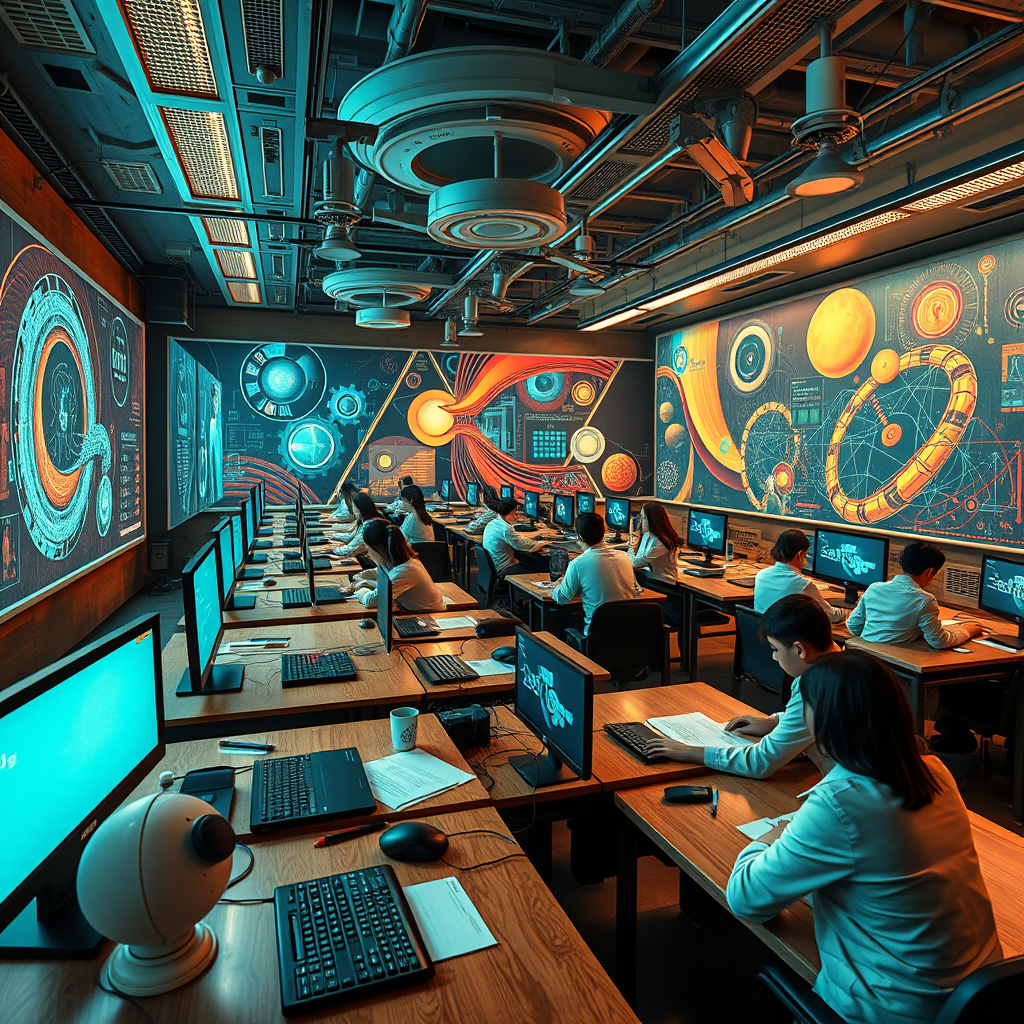

In [6]:
from IPython.display import display
from PIL import Image

# Display the image inline
display(image)

In [7]:
print(f"Is CUDA available: {torch.cuda.is_available()}")
print(f"CUDA device count: {torch.cuda.device_count()}")
print(f"Current CUDA device: {torch.cuda.current_device()}")
print(f"CUDA device name: {torch.cuda.get_device_name(0)}")

Is CUDA available: True
CUDA device count: 1
Current CUDA device: 0
CUDA device name: NVIDIA GeForce RTX 3090
